In [39]:
from matplotlib import ticker
import os,sys
import pandas as pd
import anndata
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
from PyComplexHeatmap import *
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'

In [40]:
metadata=pd.read_csv("BG_HBA_with_SI_BNST_metadata.tsv.gz",index_col=0,sep='\t')
metadata

,InputReadPairs,InputReadPairsBP,TrimmedReadPairs,R1WithAdapters,R1QualTrimBP,R1TrimmedReadsBP,R2WithAdapters,R2QualTrimBP,R2TrimmedReadsBP,UniqueMappedReads,...,cell_type_id,donor,SubType,MajorType,CellClass,Batch,tech,HmCHCov,HmCHmC,HmCHFrac
cell,,,,,,,,,,,,,,,,,,,,,
HBA_220322_H1930002_CX48_GPe_3C_1_P2-6-K18-A12,3184122,960543685,3182755,1226,824864,403058366,2202,754710,428407311,3700850.0,...,100,h1930002,MGC_0,MGC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P1-2-M14-B4,714291,215123881,713928,174,167867,90238832,247,159533,95965419,865327.0,...,101,h1930002,ODC_0,ODC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P2-6-K18-I12,2362328,712868646,2361328,616,732621,299026864,1225,592537,317949179,2645129.0,...,102,h1930002,ODC_1,ODC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P3-6-K20-K24,1907937,575333721,1906879,858,485511,241396661,1272,433803,256613183,2223558.0,...,100,h1930002,MGC_0,MGC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P7-5-L3-P22,2607976,785266032,2606126,684,477698,329541152,1132,611508,350215270,3057751.0,...,102,h1930002,ODC_1,ODC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBA_220201_H1930004_CX47_BNST_1_P8-2-I15-B16,1490463,433485515,1489686,366,299823,180726445,692,387242,192405819,2377792.0,...,69,h1930004,SubCtx_Inh_0,SubCtx-Cplx,Inhibitory/non-telencephalic neurons,HBA_snmC,snmC,NaN,NaN,NaN
HBA_220201_H1930004_CX47_BNST_1_P7-5-A11-M21,514477,148303482,513170,131,107399,61700350,253,141387,65724216,811064.0,...,74,h1930004,SubCtx_Inh_5,SubCtx-Cplx,Inhibitory/non-telencephalic neurons,HBA_snmC,snmC,NaN,NaN,NaN
HBA_220201_H1930004_CX47_BNST_1_P7-3-A11-J5,358402,103672865,357594,172,82742,43161242,241,119223,45937846,575320.0,...,8,h1930004,Foxp2_1,Foxp2,Inhibitory/non-telencephalic neurons,HBA_snmC,snmC,NaN,NaN,NaN


In [41]:
if not os.path.exists("df_pca.tsv"):
    mean_pca=pd.DataFrame(adata.obsm['X_pca'],index=adata.obs_names)
    mean_pca['MajorType']=mean_pca.index.to_series().map(adata.obs['MajorType'].to_dict())
    mean_pca=mean_pca.groupby('MajorType').median() #mean or median?
    df_pca=pd.DataFrame(mean_pca)
    df_pca.to_csv("df_pca.tsv",sep='\t')
df_pca=pd.read_csv("df_pca.tsv",sep='\t',index_col=0)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
MajorType,,,,,,,,,,,,,,,,,,,,,
ASC,-6.185385,2.063680,-2.673907,-26.243917,-10.898765,7.697167,-2.974320,1.026790,0.775394,-1.070190,...,0.077760,0.010935,0.112232,0.154969,0.021569,-0.166352,-0.066355,-0.075087,0.001657,0.097887
Amy-Exc,-38.930565,-3.533070,-4.327548,0.313341,1.105036,-1.860224,7.141367,1.754738,-4.916781,7.849453,...,-0.826889,-3.989859,0.055244,2.209698,-5.034589,-3.008329,-3.377766,1.798049,-1.144573,1.898596
Chd7,-45.256973,3.364799,-0.269149,-10.733472,8.293569,-1.043610,16.352848,4.031204,0.273276,-0.059995,...,0.749673,-0.175595,0.092543,-0.924502,1.124693,1.283872,0.366372,-0.082858,-0.561670,0.307433
EC,26.527790,-32.688114,3.547755,3.290614,-9.286152,13.747752,17.052784,-26.857656,-3.802744,-1.965232,...,-0.454820,0.112404,-0.249004,-0.404655,-0.115365,0.185276,0.162324,-0.059130,0.321319,-0.346724
Foxp2,-39.184080,-3.191470,-7.375666,11.819609,-10.055280,0.527003,8.994095,6.077620,-3.421436,6.529488,...,0.193791,1.811393,-0.045932,0.191962,0.276209,0.760037,0.084653,-0.728828,0.759542,-0.386478
L2/3-IT,-26.673965,-4.740163,-11.936588,12.619617,-15.753070,-5.141675,0.197362,4.383984,-10.579296,10.414892,...,-1.967462,-8.375200,2.469593,3.431513,-11.031931,-10.825530,-5.029544,5.434872,-1.934668,2.062068
L4-IT,-31.200870,-3.501565,-11.205349,2.381891,-5.737471,-3.612785,2.949486,2.524159,-7.884211,9.838444,...,-1.117531,-7.639537,1.560820,3.544555,-9.953213,-8.711222,-5.156053,4.452472,-1.650653,2.180878
L5-ET,-37.951553,-4.090756,-1.749908,6.474921,-6.822777,-3.110141,6.139513,6.207369,-9.818862,5.759337,...,-0.751153,-5.099033,1.523441,2.615486,-7.550120,-5.248197,-2.845663,4.359980,-0.328301,1.857810
L5-IT,-37.812460,-3.408605,-6.648603,3.468422,-4.425308,-4.785133,4.412619,2.770933,-7.552199,7.736069,...,-1.393592,-6.683504,1.539244,3.907492,-9.450362,-7.772538,-3.954494,4.600186,-1.241237,2.778129


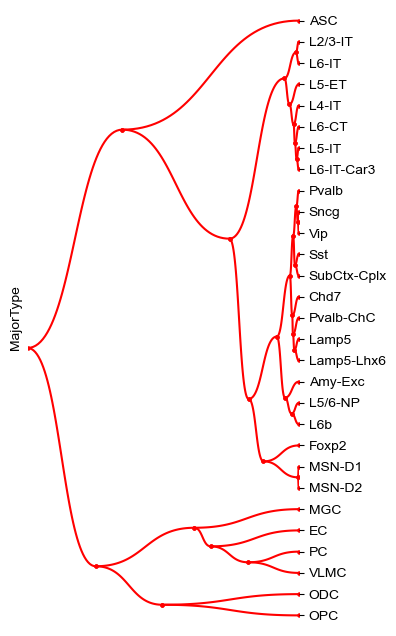

In [42]:
dend=DendrogramPlotter(df_pca)
plt.figure(figsize=(3.5,8))
ax=plt.gca()
dend.plot(ax=ax,axis=0,label=True,bezier=True,dotsize=5,tree_kws=dict(colors='red'))
plt.show()

## Test anno_dendrogram

In [43]:
metadata

,InputReadPairs,InputReadPairsBP,TrimmedReadPairs,R1WithAdapters,R1QualTrimBP,R1TrimmedReadsBP,R2WithAdapters,R2QualTrimBP,R2TrimmedReadsBP,UniqueMappedReads,...,cell_type_id,donor,SubType,MajorType,CellClass,Batch,tech,HmCHCov,HmCHmC,HmCHFrac
cell,,,,,,,,,,,,,,,,,,,,,
HBA_220322_H1930002_CX48_GPe_3C_1_P2-6-K18-A12,3184122,960543685,3182755,1226,824864,403058366,2202,754710,428407311,3700850.0,...,100,h1930002,MGC_0,MGC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P1-2-M14-B4,714291,215123881,713928,174,167867,90238832,247,159533,95965419,865327.0,...,101,h1930002,ODC_0,ODC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P2-6-K18-I12,2362328,712868646,2361328,616,732621,299026864,1225,592537,317949179,2645129.0,...,102,h1930002,ODC_1,ODC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P3-6-K20-K24,1907937,575333721,1906879,858,485511,241396661,1272,433803,256613183,2223558.0,...,100,h1930002,MGC_0,MGC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
HBA_220322_H1930002_CX48_GPe_3C_1_P7-5-L3-P22,2607976,785266032,2606126,684,477698,329541152,1132,611508,350215270,3057751.0,...,102,h1930002,ODC_1,ODC,Non-neuronal Cells,HBA_snm3C,snm3C,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBA_220201_H1930004_CX47_BNST_1_P8-2-I15-B16,1490463,433485515,1489686,366,299823,180726445,692,387242,192405819,2377792.0,...,69,h1930004,SubCtx_Inh_0,SubCtx-Cplx,Inhibitory/non-telencephalic neurons,HBA_snmC,snmC,NaN,NaN,NaN
HBA_220201_H1930004_CX47_BNST_1_P7-5-A11-M21,514477,148303482,513170,131,107399,61700350,253,141387,65724216,811064.0,...,74,h1930004,SubCtx_Inh_5,SubCtx-Cplx,Inhibitory/non-telencephalic neurons,HBA_snmC,snmC,NaN,NaN,NaN
HBA_220201_H1930004_CX47_BNST_1_P7-3-A11-J5,358402,103672865,357594,172,82742,43161242,241,119223,45937846,575320.0,...,8,h1930004,Foxp2_1,Foxp2,Inhibitory/non-telencephalic neurons,HBA_snmC,snmC,NaN,NaN,NaN


In [44]:
df=metadata.loc[:,['MajorType','mCGFrac','mCHFrac']].groupby('MajorType').mean()
vc=metadata['MajorType'].value_counts().to_dict()
df['#Cells']=df.index.to_series().map(vc)
CellClass=metadata.loc[:,['MajorType','CellClass']].reset_index().drop_duplicates().set_index('MajorType').CellClass.to_dict()
df['CellClass']=df.index.to_series().map(CellClass)
df

,mCGFrac,mCHFrac,#Cells,CellClass
MajorType,,,,
ASC,0.780405,0.013840,6285,Non-neuronal Cells
Amy-Exc,0.807098,0.049853,12,Telencephalic excitatory neurons
CA3,0.780362,0.022678,3,Telencephalic excitatory neurons
CB,0.786929,0.025257,5,Inhibitory/non-telencephalic neurons
Chd7,0.833616,0.047265,2467,Inhibitory/non-telencephalic neurons
EC,0.747018,0.009164,485,Non-neuronal Cells
Foxp2,0.815653,0.033836,4459,Inhibitory/non-telencephalic neurons
HIP-Misc1,0.823063,0.042266,1,Telencephalic excitatory neurons
L2/3-IT,0.798390,0.045121,244,Telencephalic excitatory neurons


In [45]:
keep_rows=list(set(df.index.tolist()) & set(df_pca.index.tolist()))
df_pca=df_pca.loc[keep_rows]
df=df.loc[keep_rows]
df_pca

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
MajorType,,,,,,,,,,,,,,,,,,,,,
Lamp5,-39.644398,2.617424,-1.074082,-9.310522,5.041016,2.387072,15.927599,3.467832,1.190357,2.461777,...,0.575064,-0.914867,-0.196399,0.168482,-0.737702,-0.250824,-0.002979,-0.436584,-0.003029,0.413360
OPC,6.644025,10.284329,-3.580192,-9.224529,-7.448525,-17.900670,2.748838,-5.193218,4.950306,0.339529,...,0.070251,0.265234,-0.106605,-0.251945,-0.042705,0.091219,-0.243692,0.093993,-0.195914,0.340544
Amy-Exc,-38.930565,-3.533070,-4.327548,0.313341,1.105036,-1.860224,7.141367,1.754738,-4.916781,7.849453,...,-0.826889,-3.989859,0.055244,2.209698,-5.034589,-3.008329,-3.377766,1.798049,-1.144573,1.898596
MSN-D2,-57.890410,-4.805495,-2.617100,11.228474,-2.056234,0.402090,-5.543216,-2.926044,1.228502,-1.455745,...,0.567150,-0.115680,-0.030148,0.603628,-0.158990,0.761413,0.280589,0.338141,-0.297994,0.012521
L2/3-IT,-26.673965,-4.740163,-11.936588,12.619617,-15.753070,-5.141675,0.197362,4.383984,-10.579296,10.414892,...,-1.967462,-8.375200,2.469593,3.431513,-11.031931,-10.825530,-5.029544,5.434872,-1.934668,2.062068
Sncg,-50.480335,1.493617,6.341222,-13.835500,13.308707,1.075407,16.157661,0.426305,5.779812,4.111438,...,-0.451735,0.559489,0.336273,-0.664962,-0.008487,0.532989,0.113517,-0.172804,-0.228933,0.754394
Vip,-51.157560,3.132333,5.028330,-15.125410,14.272235,1.677506,15.566135,-0.374252,5.044553,2.994858,...,0.242094,0.005533,-0.023746,0.129438,-0.164893,0.491951,-0.411548,0.018306,-0.490980,-0.279255
L5/6-NP,-58.737946,-2.229365,12.160391,-7.503811,11.286453,-3.773336,11.555239,2.394086,-1.065539,3.039342,...,-0.183951,-0.623756,1.202788,2.001793,-3.876940,-0.872864,-0.893597,0.289134,0.500606,1.112785
Lamp5-Lhx6,-40.506240,4.478299,-3.723694,-4.603326,5.442305,0.836165,16.252256,3.748447,-0.713584,-0.059195,...,-0.510765,0.433785,1.052773,-0.531846,-0.635088,0.956534,0.165097,-0.867622,-1.703597,-1.547097


Starting plotting HeatmapAnnotations


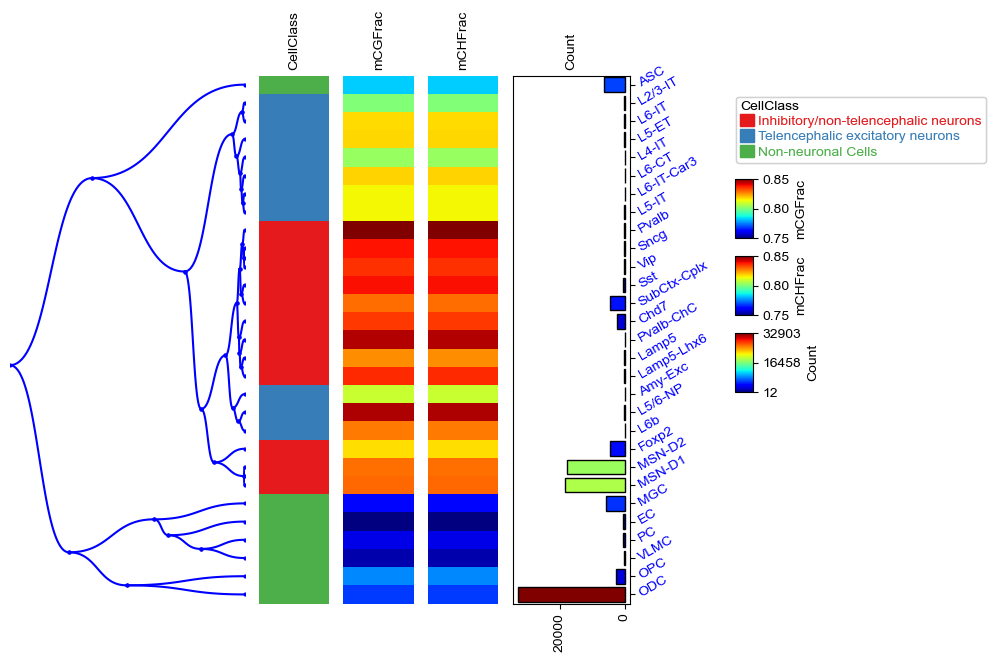

In [46]:
plt.figure(figsize=(8, 6))
col_ha = HeatmapAnnotation(
            dend=anno_dendrogram(df_pca,bezier=True,dotsize=4,height=10,colors='blue'),
            CellClass=anno_simple(df.CellClass,add_text=False),
            mCGFrac=anno_simple(df.mCGFrac),
            mCHFrac=anno_simple(df.mCGFrac),
            Count=anno_barplot(df['#Cells'],cmap='jet',legend=True,height=5),
            plot=True,legend=True,legend_gap=5,
            hgap=1,wgap=4,legend_hpad=25,legend_width=65,
            axis=0)
# col_ha.plot_annotations(hspace=0.1)
col_ha.show_ticklabels(col_ha.annotations[0].plot_data.index.tolist(),fontdict={'color':'blue'},rotation=30)
plt.savefig("test.pdf")
plt.show()

Starting plotting HeatmapAnnotations


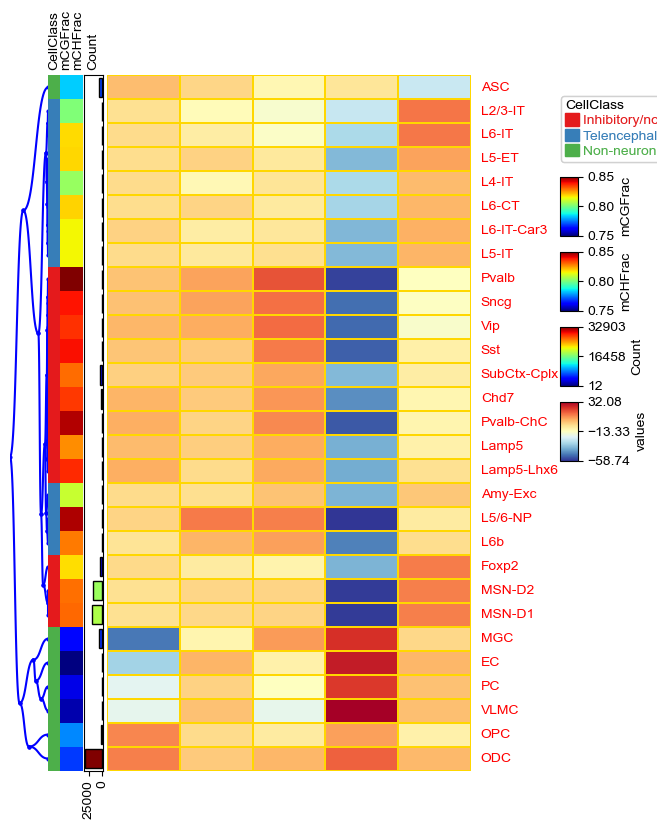

In [47]:
plt.figure(figsize=(6, 8))
row_ha = HeatmapAnnotation(
            dend=anno_dendrogram(df_pca,bezier=True,dotsize=4,height=10,colors='blue'),
            CellClass=anno_simple(df.CellClass,add_text=False),
            mCGFrac=anno_simple(df.mCGFrac),
            mCHFrac=anno_simple(df.mCGFrac),
            Count=anno_barplot(df['#Cells'],cmap='jet',legend=True,height=5),
            legend=True,
            axis=0)
cm = ClusterMapPlotter(
            data=df_pca.loc[row_ha.annotations[0].row_order[0]].iloc[:,:5],left_annotation=row_ha,
            # row_split=3,row_split_gap=3,
            col_cluster=True,row_cluster=False,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=False,
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            annot=False,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red'),#subplot_gap=8
)

plt.show()

Starting plotting HeatmapAnnotations


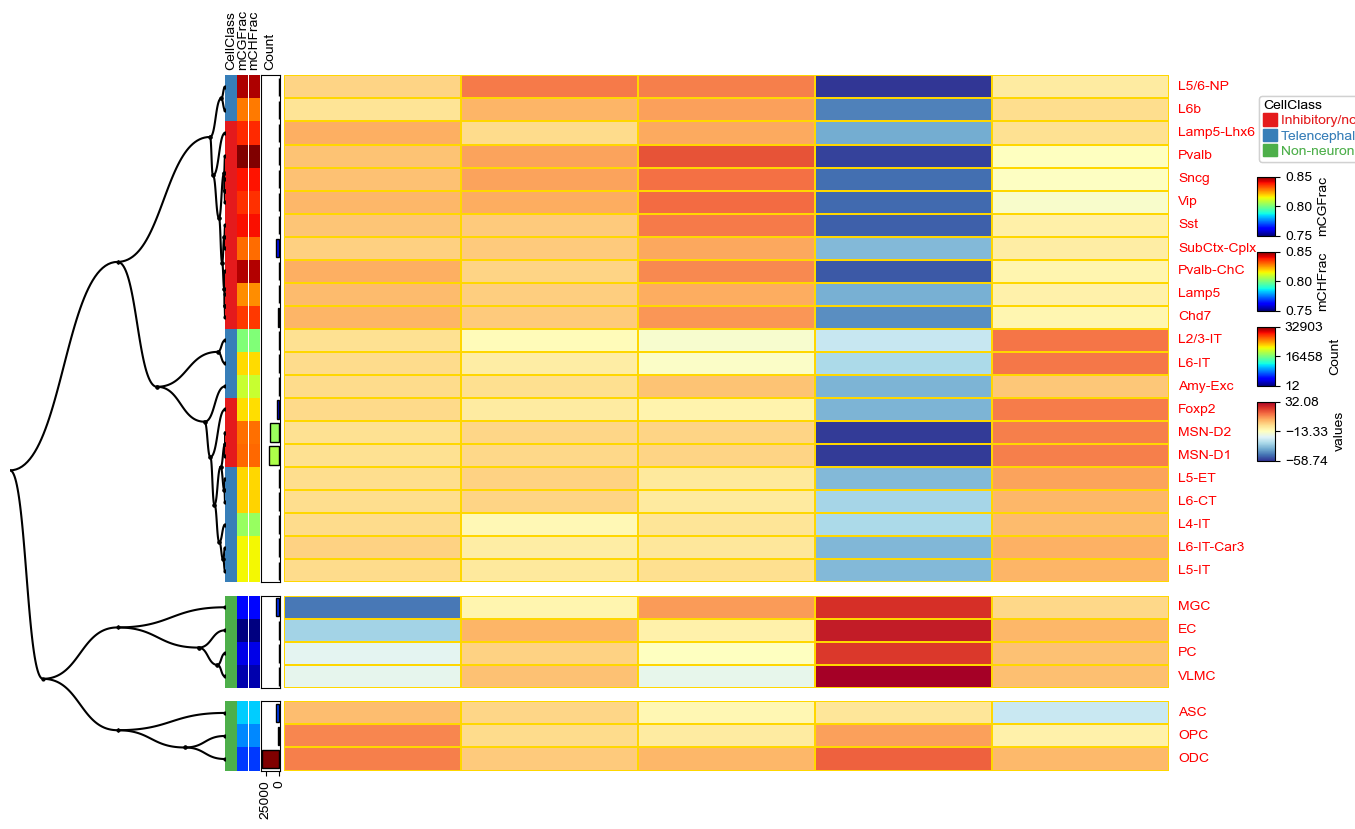

In [48]:
plt.figure(figsize=(15, 8))
row_ha = HeatmapAnnotation(
            CellClass=anno_simple(df.CellClass,add_text=False),
            mCGFrac=anno_simple(df.mCGFrac),
            mCHFrac=anno_simple(df.mCGFrac),
            Count=anno_barplot(df['#Cells'],cmap='jet',legend=True,height=5),
            legend=True,
            axis=0)
cm = ClusterMapPlotter(
            data=df_pca.iloc[:,:5],left_annotation=row_ha,
            row_split=3,row_split_gap=3,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=True,
            row_dendrogram_size=55,bezier=True,dotsize=4,
            show_rownames=True,show_colnames=False,
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            annot=False,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red'),#subplot_gap=8
)

plt.show()

In [49]:
col_ha.gs

GridSpec(1, 5, width_ratios=[10, 3, 3, 3, 5])

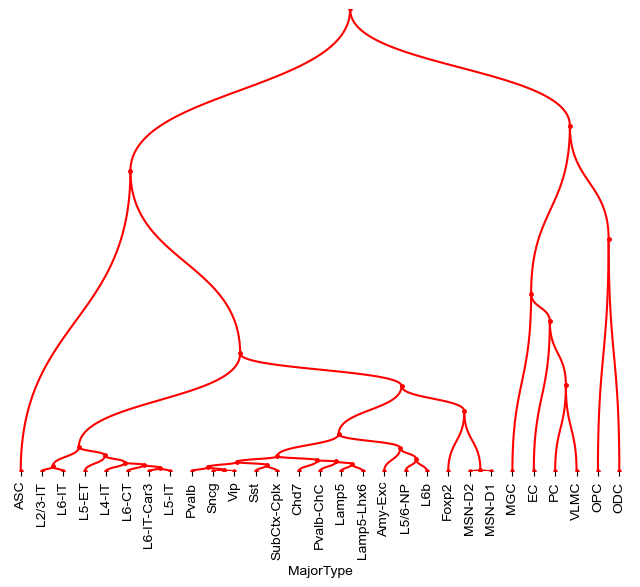

In [50]:
dend=DendrogramPlotter(df_pca)
plt.figure(figsize=(8,6))
ax=plt.gca()
dend.plot(ax=ax,axis=1,label=True,bezier=True,dotsize=5,tree_kws=dict(colors='red'))
plt.show()